In [ ]:
import numpy as np
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob
from keras.models import Sequential, load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle

In [ ]:
def bk(img):
  height, width = img.shape[:2]
  resized_height, resized_width = int(300), int(450)
  resized_img = cv2.resize(img, (resized_width, resized_height), interpolation = cv2.INTER_LINEAR)

  img=resized_img
  height, width, _ = img.shape
  gray = np.zeros((height, width), dtype=np.uint8)


  for i in range(height):
      for j in range(width):
          b, g, r = img[i, j]
          gray[i, j] = (r * 0.2989) + (g * 0.5870) + (b * 0.1140)

  # Create an empty black and white image
  thresh = np.zeros((height, width), dtype=np.uint8)

  # Apply thresholding to make the image black and white
  for i in range(height):
      for j in range(width):
          if gray[i, j] >= 225:
              thresh[i, j] = 255
          else:
              thresh[i, j] = 0
  return [thresh,gray]

Epoch 1/6
4/4 [==============================] - 63s 15s/step - loss: 325.0295 - accuracy: 0.4485 - val_loss: 43.8571 - val_accuracy: 0.8690
Epoch 2/6
4/4 [==============================] - 34s 8s/step - loss: 39.8201 - accuracy: 0.8299 - val_loss: 28.8100 - val_accuracy: 0.1310
Epoch 3/6
4/4 [==============================] - 73s 17s/step - loss: 16.7985 - accuracy: 0.1701 - val_loss: 0.5573 - val_accuracy: 0.7976
Epoch 4/6
4/4 [==============================] - 31s 7s/step - loss: 0.5254 - accuracy: 0.8299 - val_loss: 0.4848 - val_accuracy: 0.9167
Epoch 5/6
4/4 [==============================] - 36s 8s/step - loss: 0.2372 - accuracy: 0.9485 - val_loss: 1.6403 - val_accuracy: 0.8929
Epoch 6/6
7/7 [==============================] - 4s 492ms/step
[[4.48055509e-10]
 [2.63740984e-03]
 [4.75194906e-09]
 [4.36992228e-01]
 [2.12870361e-07]
 [1.89526156e-02]
 [2.35853478e-01]
 [8.64292443e-01]
 [4.52504873e-01]
 [1.74117620e-09]
 [1.35429756e-09]
 [7.08573163e-01]
 [9.41408694e-01]
 [1.791123

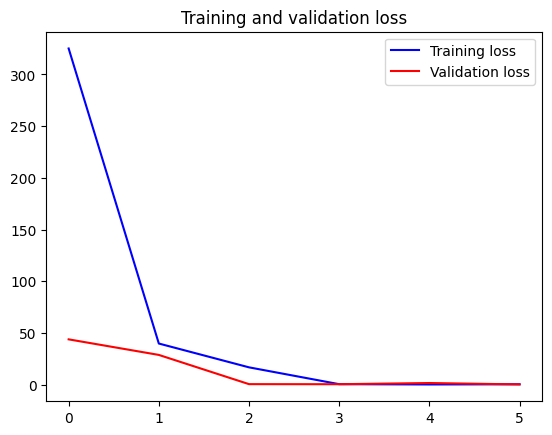

0.8944723618090452
[[126  21]
 [  0  52]]


In [ ]:
train_data = []
train_labels = []
name = 'Images'
ep = 6
for per in os.listdir('Images (1)/'+name+'/train/'):
    for data in glob.glob('Images (1)/'+name+'/train/'+per+'/*.*'):
        img =  cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img1 = np.array(img)
        img = cv2.resize(img1, (300, 450))
        img[img == 0] = 229
        train_data.append([img])
        if per[-1]=='l':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)
train_labels = np.array(train_labels)
#Test Data

test_data = []
test_labels = []
for per in os.listdir('Images (1)/'+name+'/test/'):
    for data in glob.glob('Images (1)/'+name+'/test/'+per+'/*.*'):
        img =  cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img1 = np.array(img)
        img = cv2.resize(img1, (300, 450))
        img[img == 0] = 229
        test_data.append([img])
        if per[-1]=='l':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))
test_data = np.array(test_data)
test_labels = np.array(test_labels)
train_data = train_data.reshape(-1, 300,450, 1)
test_data = test_data.reshape(-1, 300,450, 1)
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)
network = Sequential()
network.add(Conv2D(64,(3,3),input_shape=(300,450,1),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(64,(3,3),input_shape=(300,450,1),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Flatten())
network.add(Dense(1,activation = 'sigmoid'))
network.compile(optimizer = Adam(),loss="binary_crossentropy",metrics=["accuracy"])

progress = network.fit(train_data, train_labels, batch_size=64, epochs=ep, validation_split=0.3)
# network.save('sigver4.h5')
pred = network.predict(test_data)
print(pred)
for i in range(len(pred)):
    if pred[i] < 0.35:
        pred[i] = 0
    else:
        pred[i] = 1
print(pred.reshape(1,-1))
print(test_labels)
acc = progress.history['accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print(accuracy_score(pred, test_labels))
print(confusion_matrix(test_labels, pred))

In [ ]:
noise_amount = 30
blur_amount = 5
max_rotation = 27


def imggen(pers):
    train_real_files = glob.glob('Images (1)/'+pers+'/train/real/*.*')
    for file in train_real_files:
        print(file)
        for i in range(25):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Apply noise
            noise = np.random.randint(-noise_amount, noise_amount, size=img.shape)
            img = img.astype(np.int16) + noise
            img = np.clip(img, 0, 255).astype(np.uint8)

            # Apply blur
            img = cv2.GaussianBlur(img, (blur_amount, blur_amount), 0)

            # Apply rotation
            rows, cols = img.shape[:2]
            rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), np.random.uniform(-max_rotation, max_rotation), 1)
            img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

            # Save transformed image
            filename, ext = os.path.splitext(file)
            new_filename = f"{filename}_{i}transformed_{ext}"
            cv2.imwrite(new_filename, img)

    train_forged_files = glob.glob('Images (1)/'+pers+'/train/forged/*.*')
    print(train_forged_files)
    for file in train_forged_files:
        print(file)
        for i in range(25):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Apply noise
            noise = np.random.randint(-noise_amount, noise_amount, size=img.shape)
            img = img.astype(np.int16) + noise
            img = np.clip(img, 0, 255).astype(np.uint8)

            # Apply blur
            img = cv2.GaussianBlur(img, (blur_amount, blur_amount), 0)

            # Apply rotation
            rows, cols = img.shape[:2]
            rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), np.random.uniform(-max_rotation, max_rotation), 1)
            img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

            # Save transformed image
            filename, ext = os.path.splitext(file)
            new_filename = f"{filename}_{i}transformed_{ext}"
            cv2.imwrite(new_filename, img)

    test_real_files = glob.glob('Images (1)/'+pers+'/test/real/*.*')
    for file in test_real_files:
        print(file)
        for i in range(26):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Apply noise
            noise = np.random.randint(-noise_amount, noise_amount, size=img.shape)
            img = img.astype(np.int16) + noise
            img = np.clip(img, 0, 255).astype(np.uint8)

            # Apply blur
            img = cv2.GaussianBlur(img, (blur_amount, blur_amount), 0)

            # Apply rotation
            rows, cols = img.shape[:2]
            rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), np.random.uniform(-max_rotation, max_rotation), 1)
            img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

            # Save transformed image
            filename, ext = os.path.splitext(file)
            new_filename = f"{filename}_{i}transformed_{ext}"
            cv2.imwrite(new_filename, img)

    test_forged_files = glob.glob('Images (1)/'+pers+'/test/forged/*.*')
    for file in test_forged_files:
        print(file)
        for i in range(26):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Apply noise
            noise = np.random.randint(-noise_amount, noise_amount, size=img.shape)
            img = img.astype(np.int16) + noise
            img = np.clip(img, 0, 255).astype(np.uint8)

            # Apply blur
            img = cv2.GaussianBlur(img, (blur_amount, blur_amount), 0)

            # Apply rotation
            rows, cols = img.shape[:2]
            rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), np.random.uniform(-max_rotation, max_rotation), 1)
            img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

            # Save transformed image
            filename, ext = os.path.splitext(file)
            new_filename = f"{filename}_{i}transformed_{ext}"
            cv2.imwrite(new_filename, img)

In [ ]:
imggen("Shubham")

Images (1)/Shubham/train/real\IMG_1816(1).jpg
Images (1)/Shubham/train/real\IMG_1816(2).jpg
Images (1)/Shubham/train/real\IMG_1816(3).jpg
Images (1)/Shubham/train/real\IMG_1816(4).jpg
Images (1)/Shubham/train/real\IMG_1816(5).jpg
Images (1)/Shubham/train/real\IMG_1816(6).jpg
Images (1)/Shubham/train/real\IMG_1816.jpg
['Images (1)/Shubham/train/forged\\IMG_1823(1).jpg', 'Images (1)/Shubham/train/forged\\IMG_1823(2).jpg', 'Images (1)/Shubham/train/forged\\IMG_1823(4).jpg', 'Images (1)/Shubham/train/forged\\IMG_1823(5).jpg', 'Images (1)/Shubham/train/forged\\IMG_1823(6).jpg', 'Images (1)/Shubham/train/forged\\IMG_1823(7).jpg']
Images (1)/Shubham/train/forged\IMG_1823(1).jpg
Images (1)/Shubham/train/forged\IMG_1823(2).jpg
Images (1)/Shubham/train/forged\IMG_1823(4).jpg
Images (1)/Shubham/train/forged\IMG_1823(5).jpg
Images (1)/Shubham/train/forged\IMG_1823(6).jpg
Images (1)/Shubham/train/forged\IMG_1823(7).jpg
